In [1]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import os
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [2]:
wd = os.getcwd()
country_path = os.path.join(wd, 'src', 'wikitravel', 'countries.txt')
with open(country_path, 'r') as f:
    countries = f.read().lower().split('\n')
countries

['afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'antigua & deps',
 'argentina',
 'armenia',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia herzegovina',
 'botswana',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cape verde',
 'central african rep',
 'chad',
 'chile',
 'china',
 'colombia',
 'comoros',
 'congo',
 'congo {democratic rep}',
 'costa rica',
 'croatia',
 'cuba',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'east timor',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'eritrea',
 'estonia',
 'ethiopia',
 'fiji',
 'finland',
 'france',
 'gabon',
 'gambia',
 'georgia',
 'germany',
 'ghana',
 'greece',
 'grenada',
 'guatemala',
 'guinea',
 'guinea-bissau',
 'guyana',
 'haiti',
 'honduras',
 'hungary',
 'iceland',
 'india',
 'indones

In [3]:
model = KeyedVectors.load_word2vec_format(os.path.join(wd, 'model.bin'), binary=True)

In [4]:
vocab = [word for word in model.wv.vocab if word in countries]
X = model[vocab]

/Users/kasperipalkama/Documents/Koulu/word_associations/wa_venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [5]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [6]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

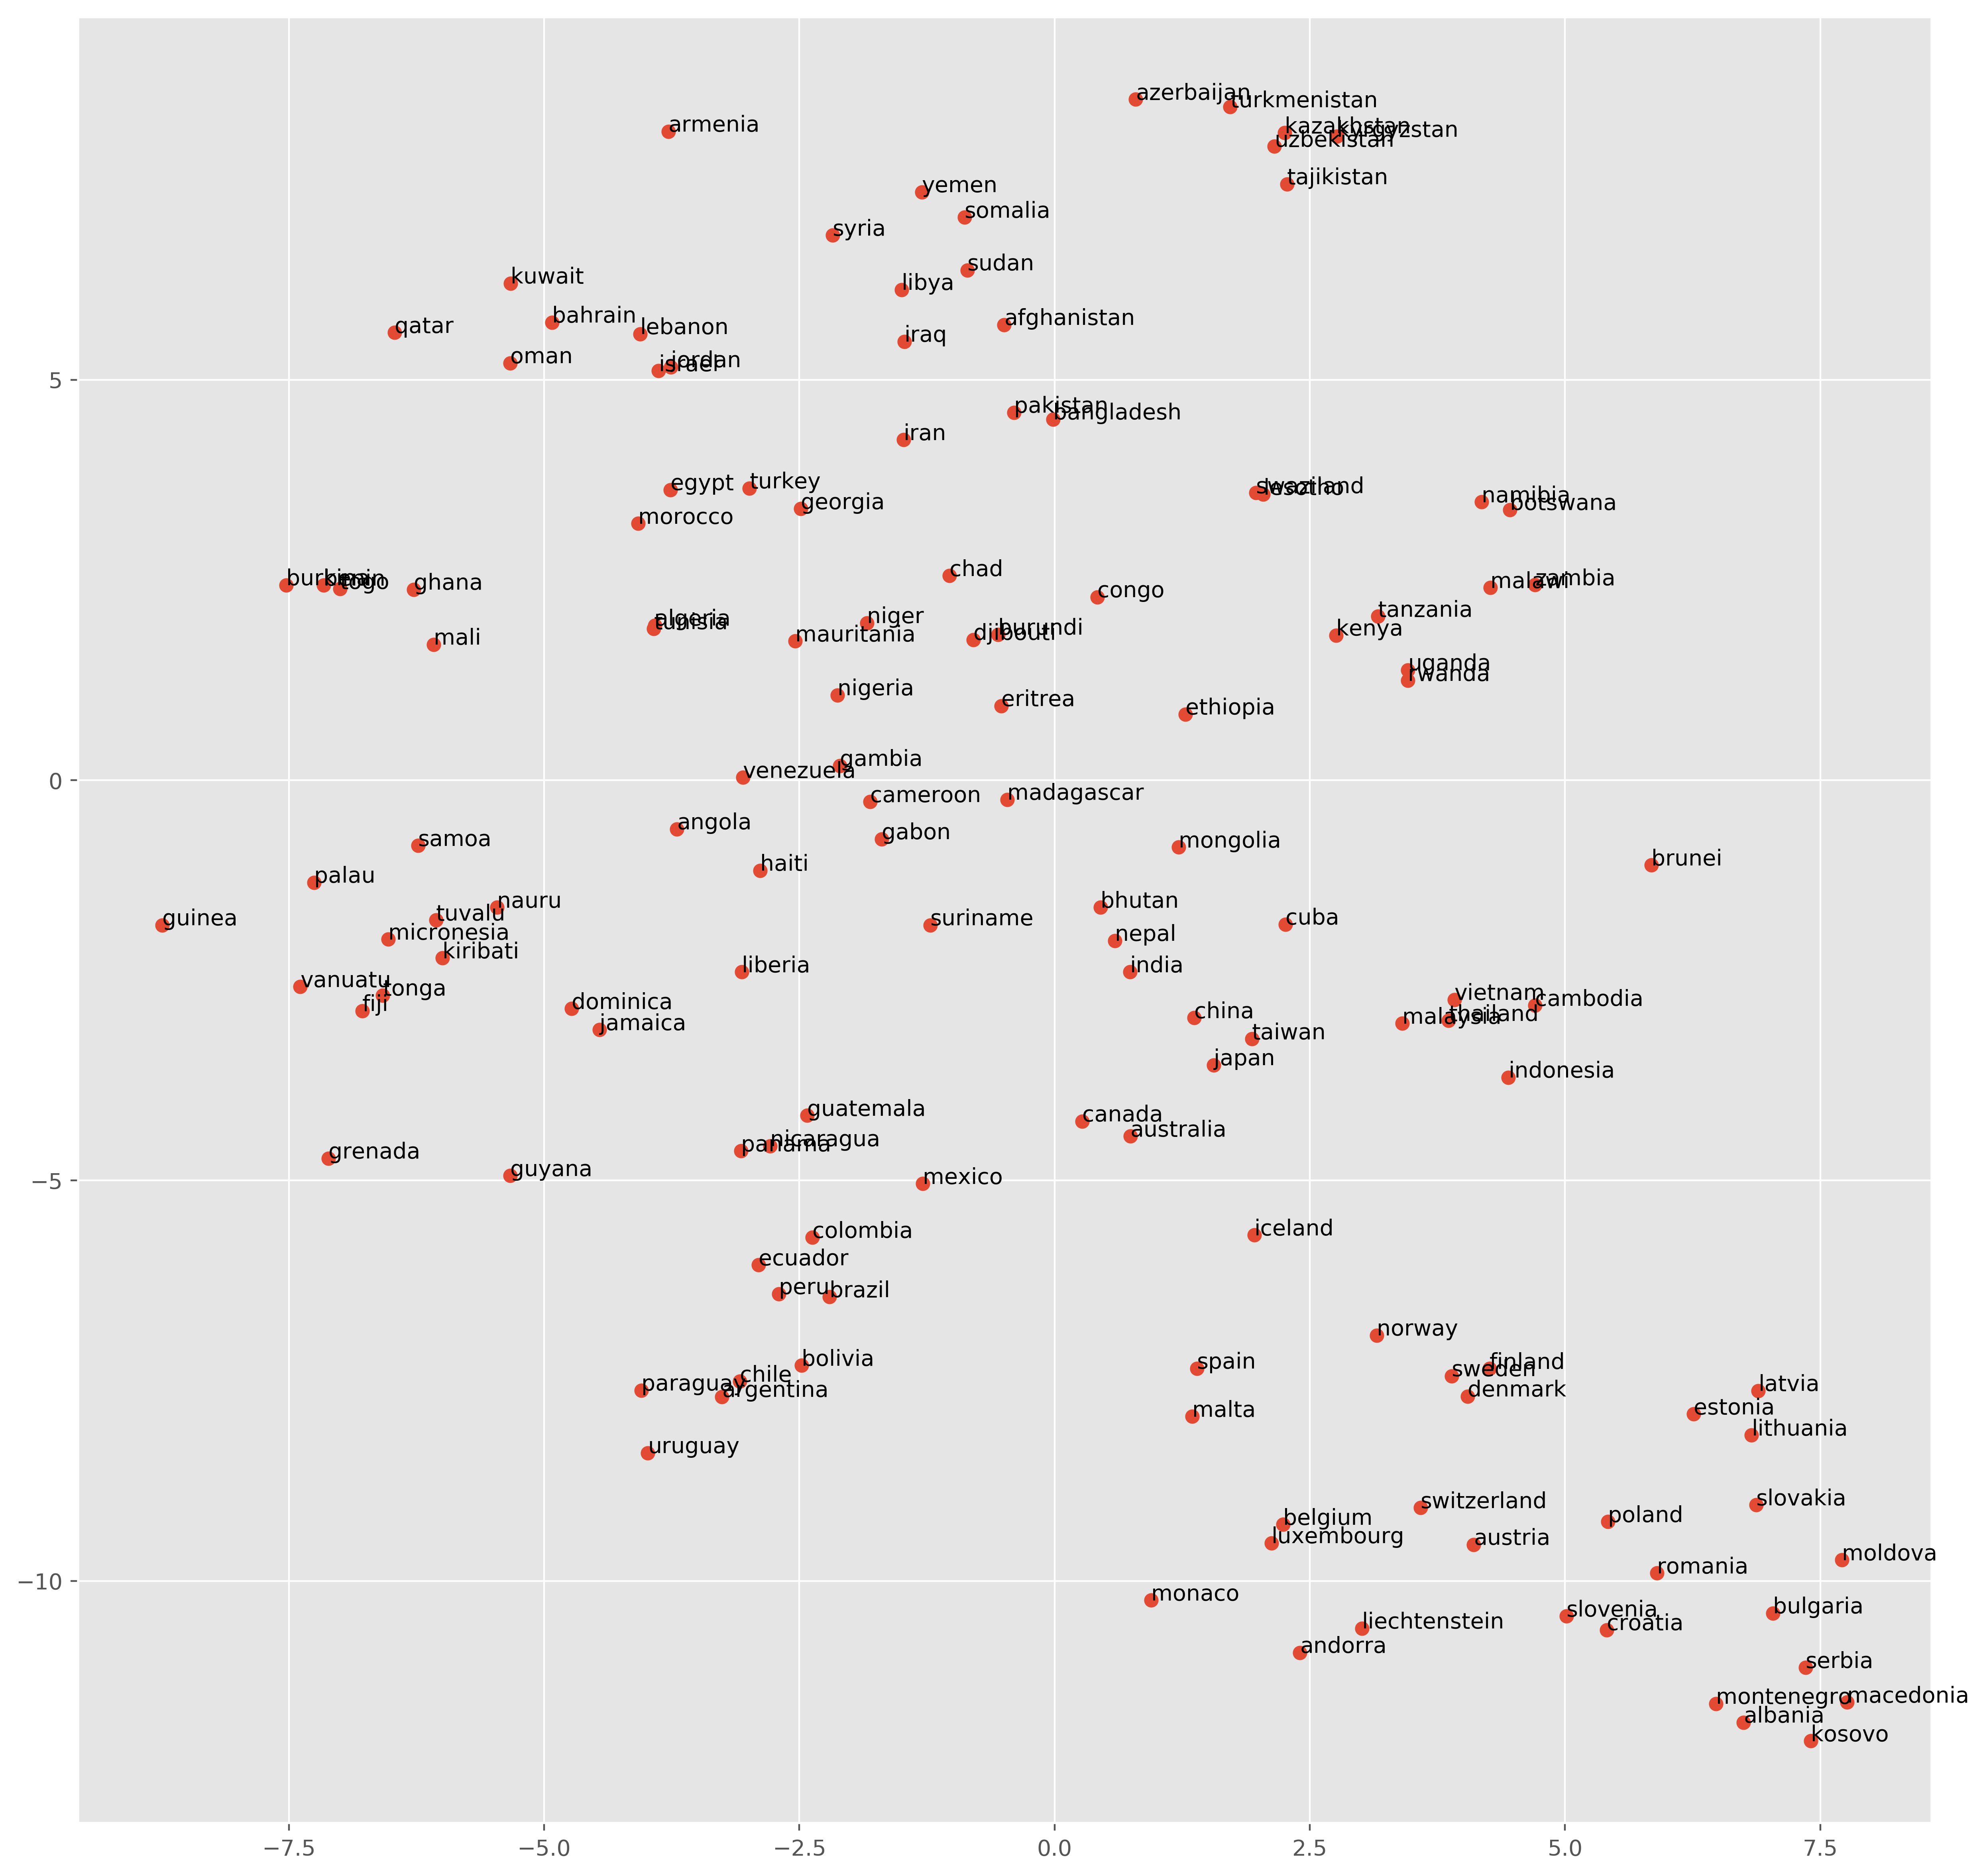

In [7]:
fig = plt.figure(figsize=[15, 15], dpi=400)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
fig.savefig(os.path.join(wd,'country_vecs.png'),  dpi=fig.dpi)